In [2]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
text = open('diskrisiDiri.csv','r')
print(text)
#for x in text.readlines():
#    print(x)

<_io.TextIOWrapper name='diskrisiDiri.csv' mode='r' encoding='cp1252'>


In [19]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5)
X = vectorizer.fit_transform(text.readlines())

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [9]:
print("Fitur Text %s " % (vectorizer.get_feature_names_out()))

Fitur Text ['aceh' 'apa' 'apalagi' 'binatang' 'bioskop' 'dikasi' 'disangka' 'eh'
 'emang' 'film' 'goreng' 'gratis' 'harimau' 'horror' 'kambing' 'kandang'
 'ke' 'kebun' 'kemarin' 'lalu' 'makan' 'malah' 'masuk' 'mie' 'muka' 'nasi'
 'paling' 'pedas' 'pemeran' 'pergi' 'salah' 'sangat' 'seminggu' 'suka'
 'tapi' 'ya' 'yang'] 


In [10]:
print("Shape : %s " % str(X.shape))

Shape : (4, 37) 


In [11]:
print("X : %s " % (X))

X :   (0, 27)	0.22125426187399413
  (0, 31)	0.22125426187399413
  (0, 36)	0.22125426187399413
  (0, 14)	0.28063297626626893
  (0, 2)	0.22125426187399413
  (0, 10)	0.37461602967882496
  (0, 26)	0.22125426187399413
  (0, 25)	0.5889398125978981
  (0, 20)	0.22125426187399413
  (0, 33)	0.37461602967882496
  (1, 0)	0.28063297626626893
  (1, 23)	0.5889398125978981
  (1, 27)	0.22125426187399413
  (1, 31)	0.22125426187399413
  (1, 36)	0.22125426187399413
  (1, 2)	0.22125426187399413
  (1, 10)	0.37461602967882496
  (1, 26)	0.22125426187399413
  (1, 20)	0.22125426187399413
  (1, 33)	0.37461602967882496
  (2, 35)	0.20971730094276944
  (2, 1)	0.26599980420542463
  (2, 30)	0.26599980420542463
  (2, 12)	0.26599980420542463
  (2, 15)	0.26599980420542463
  :	:
  (2, 5)	0.20971730094276944
  (2, 21)	0.20971730094276944
  (2, 7)	0.20971730094276944
  (2, 3)	0.26599980420542463
  (2, 17)	0.26599980420542463
  (2, 16)	0.3550822568058916
  (2, 29)	0.20971730094276944
  (2, 18)	0.26599980420542463
  (3, 8)	0

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
dist = 1 - cosine_similarity(X)
print(dist)

[[-2.22044605e-16  4.25604970e-01  1.00000000e+00  1.00000000e+00]
 [ 4.25604970e-01  0.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  0.00000000e+00  6.38844981e-01]
 [ 1.00000000e+00  1.00000000e+00  6.38844981e-01  2.22044605e-16]]


In [14]:
from sklearn.cluster import KMeans

In [15]:
km = KMeans(n_clusters=2)
km.fit(X)

C:\Users\wirar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [16]:
c = km.labels_.tolist()
print(c)

[1, 1, 0, 0]


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

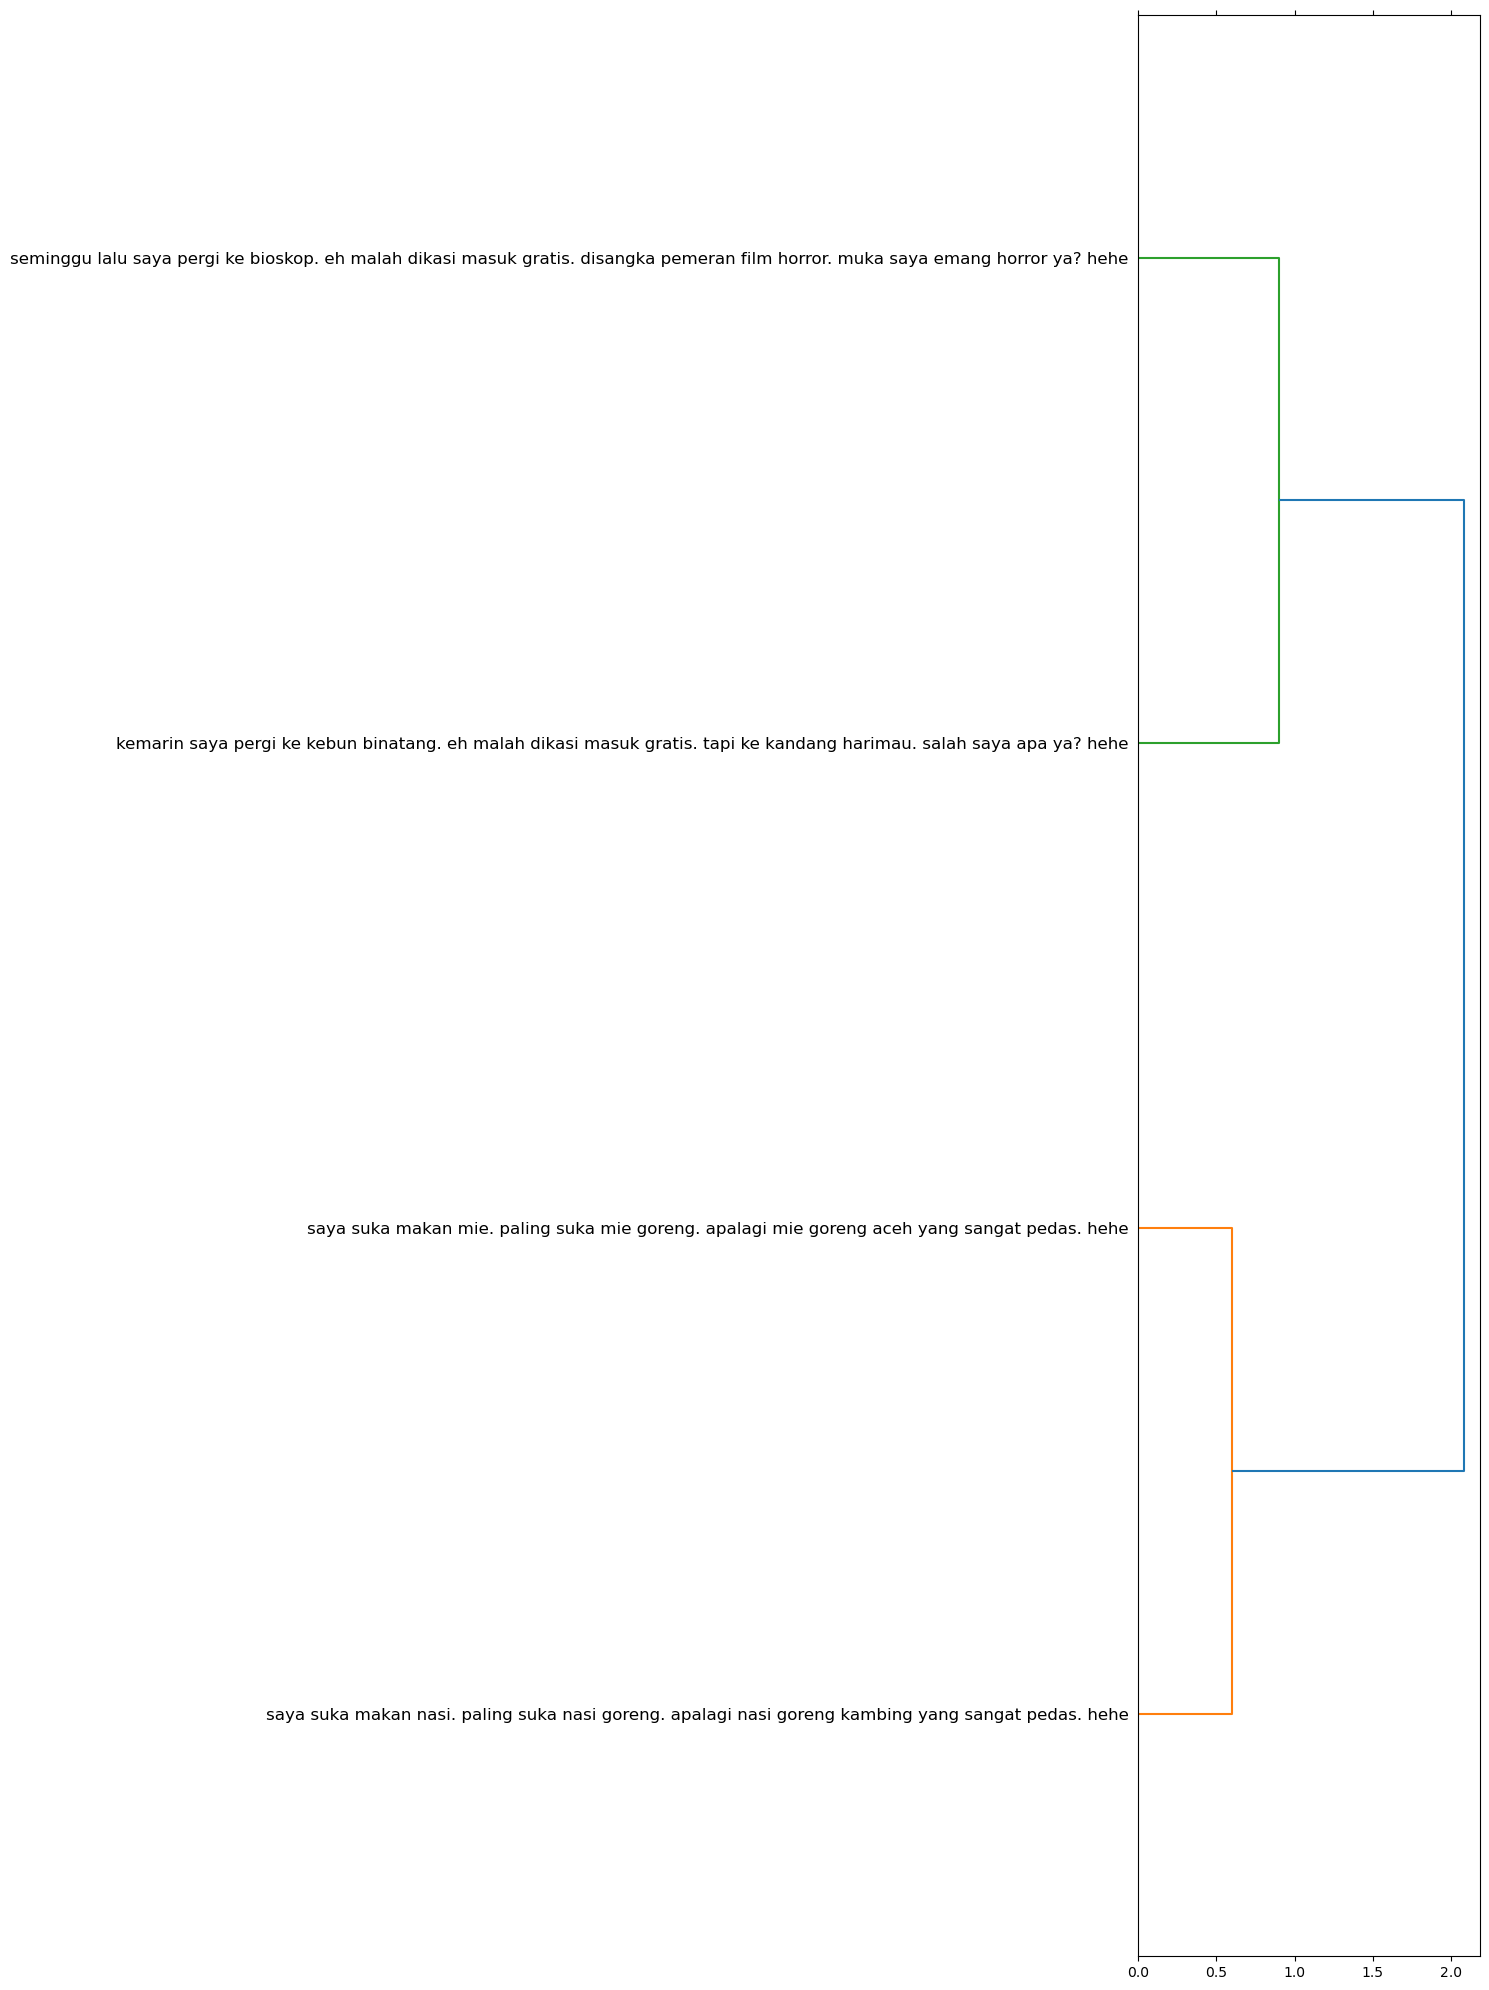

In [18]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=text.split("\n"));

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [15]:
import pandas as pd

In [16]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02'}

#set up cluster names using a dict
cluster_names = {0: 'Makanan', 
                 1: 'Nasib Apes'}

In [18]:
import matplotlib as mpl
from sklearn.manifold import MDS

In [19]:
MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

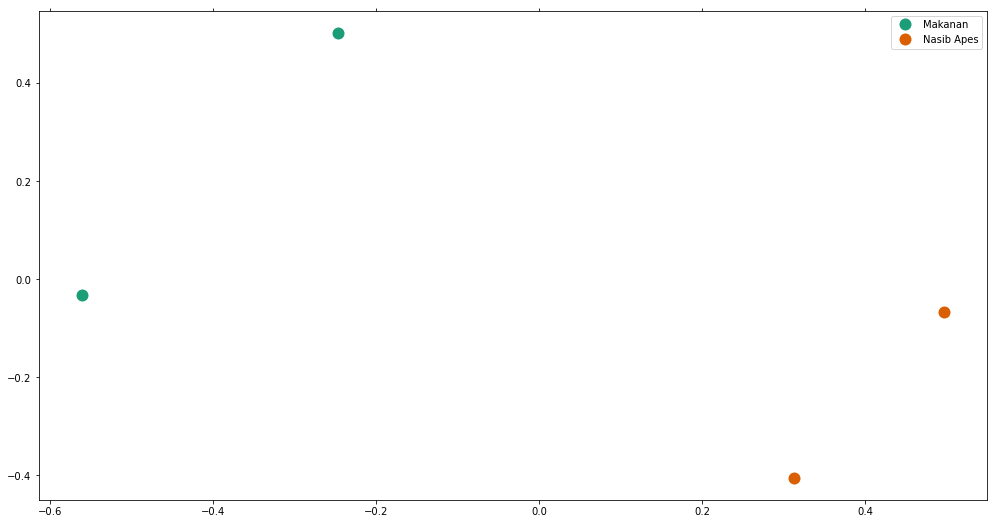

In [22]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=c, title=text.split("\n"))) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)